<a href="https://colab.research.google.com/github/vforjj/AI-ML-Review/blob/main/ch40_%5B%EC%8B%A4%EC%8A%B540%5D%EB%8C%80%EC%A4%91_%EA%B5%90%ED%86%B5_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%9D%98_%EC%8B%9C%EA%B0%81%ED%99%94%EC%99%80_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch40.[실습40] 대중 교통 데이터의 시각화와 분석

### 데이터 분석 목적
- 대중 교통 데이터를 분석하여, 현 대중 교통의 문제점을 파악한다.
- 대중 교통 데이터 분석으로 추후 대중 교통 편성에 고려하여 최적화한다.
- label이 정해져 있지 않은 데이터를 활용해서 문제를 해결해본다.


### Key Point
- 다양한 관점에서 EDA를 진행하여 데이터를 분석한다.
- 특정 데이터가 대중 교통 문제를 해결하는 Target이 될 수 있음을 파악하고 추가적인 분석을 진행한다.

In [ ]:
!pip install --upgrade pandas-profiling
# 런타임 재실행 필수!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# library for feature engineering and EDA
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas_profiling
from datetime import datetime
import random

# library for statistic
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats.mstats import kruskal

# library for machine learning
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

from xgboost import XGBRegressor
%matplotlib inline

<ipython-input-2-1642a22195ae>:8: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


## 1. Data Processing 1

### 1-1 Data Load

In [ ]:
!pwd
path_lecture = "./drive/MyDrive/MLSignature/Lecture/Part4/ch40/"
random_state = 1234

/content


In [ ]:
df = pd.read_csv(path_lecture + "data/ttc-bus-delay-data-2022.csv")
df.head()

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,1-Jan-22,320,02:00,Saturday,YONGE AND DUNDAS,General Delay,0,0,NaN,8531
1,1-Jan-22,325,02:00,Saturday,OVERLEA AND THORCLIFFE,Diversion,131,161,W,8658
2,1-Jan-22,320,02:00,Saturday,YONGE AND STEELES,Operations - Operator,17,20,S,0
3,1-Jan-22,320,02:07,Saturday,YONGE AND STEELES,Operations - Operator,4,11,S,0
4,1-Jan-22,320,02:13,Saturday,YONGE AND STEELES,Operations - Operator,4,8,S,0


### 1-2 Duplicated Data 확인

In [ ]:
print("중복된 항목 수 :", len(df[df.duplicated()]))

중복된 항목 수 : 154


In [ ]:
# to do
# dropping duplicated data
df = df.drop_duplicates().reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27197 entries, 0 to 27196
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       27197 non-null  object
 1   Route      27033 non-null  object
 2   Time       27197 non-null  object
 3   Day        27197 non-null  object
 4   Location   27197 non-null  object
 5   Incident   27197 non-null  object
 6   Min Delay  27197 non-null  int64 
 7   Min Gap    27197 non-null  int64 
 8   Direction  21668 non-null  object
 9   Vehicle    27197 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.1+ MB


## 2. Data EDA

### 2-1 Data Type and Summary

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27197 entries, 0 to 27196
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       27197 non-null  object
 1   Route      27033 non-null  object
 2   Time       27197 non-null  object
 3   Day        27197 non-null  object
 4   Location   27197 non-null  object
 5   Incident   27197 non-null  object
 6   Min Delay  27197 non-null  int64 
 7   Min Gap    27197 non-null  int64 
 8   Direction  21668 non-null  object
 9   Vehicle    27197 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.1+ MB


In [ ]:
# categorical and numeric columns
for column_name in list(df.columns):
    print(column_name, df[column_name].dtype, df[column_name].unique())

Date object ['1-Jan-22' '2-Jan-22' '3-Jan-22' '4-Jan-22' '5-Jan-22' '6-Jan-22'
 '7-Jan-22' '8-Jan-22' '9-Jan-22' '10-Jan-22' '11-Jan-22' '12-Jan-22'
 '13-Jan-22' '14-Jan-22' '15-Jan-22' '16-Jan-22' '17-Jan-22' '18-Jan-22'
 '19-Jan-22' '20-Jan-22' '21-Jan-22' '22-Jan-22' '23-Jan-22' '24-Jan-22'
 '25-Jan-22' '26-Jan-22' '27-Jan-22' '28-Jan-22' '29-Jan-22' '30-Jan-22'
 '31-Jan-22' '1-Feb-22' '2-Feb-22' '3-Feb-22' '4-Feb-22' '5-Feb-22'
 '6-Feb-22' '7-Feb-22' '8-Feb-22' '9-Feb-22' '10-Feb-22' '11-Feb-22'
 '12-Feb-22' '13-Feb-22' '14-Feb-22' '15-Feb-22' '16-Feb-22' '17-Feb-22'
 '18-Feb-22' '19-Feb-22' '20-Feb-22' '21-Feb-22' '22-Feb-22' '23-Feb-22'
 '24-Feb-22' '25-Feb-22' '26-Feb-22' '27-Feb-22' '28-Feb-22' '1-Mar-22'
 '2-Mar-22' '3-Mar-22' '4-Mar-22' '5-Mar-22' '6-Mar-22' '7-Mar-22'
 '8-Mar-22' '9-Mar-22' '10-Mar-22' '11-Mar-22' '12-Mar-22' '13-Mar-22'
 '14-Mar-22' '15-Mar-22' '16-Mar-22' '17-Mar-22' '18-Mar-22' '19-Mar-22'
 '20-Mar-22' '21-Mar-22' '22-Mar-22' '23-Mar-22' '24-Mar-22' '25-M

In [ ]:
list_cast_to_object = ["Vehicle"]
for column_name in list_cast_to_object:
  df[column_name] = df[column_name].astype(object)

In [ ]:
# to do
# define list of both categorical and numerical columns
list_categorical_columns = list(df.select_dtypes(include=["object"]).columns)
list_numeric_columns = list(df.select_dtypes(include=["float64", "int64"]).columns)
print(len(df))
print(len(df.columns))
print(len(list_categorical_columns))
print(len(list_numeric_columns))

27197
10
8
2


In [ ]:
list_categorical_columns

['Date',
 'Route',
 'Time',
 'Day',
 'Location',
 'Incident',
 'Direction',
 'Vehicle']

In [ ]:
list_numeric_columns

['Min Delay', 'Min Gap']

In [ ]:
df.isna().sum()

Date            0
Route         164
Time            0
Day             0
Location        0
Incident        0
Min Delay       0
Min Gap         0
Direction    5529
Vehicle         0
dtype: int64

#### Summary of Data Set
##### - Number of Variables : 10
    categorical variables : 8
    numeric variables : 2
##### - Number of observations : 27197 (duplicated 데이터 제거)
##### - Missing Cells : 2 columns
##### - Duplicated Rows : 154

### 2-2 Independent(독립) Data Explore

#### 1) Categorical Data Analysis

##### 불필요한 컬럼 확인

In [ ]:
# to do
df[list_categorical_columns].nunique().sort_values()

Day             7
Direction      12
Incident       15
Date          181
Route         223
Time         1440
Vehicle      2189
Location     5942
dtype: int64

In [ ]:
df[list_categorical_columns].head(3)

,Date,Route,Time,Day,Location,Incident,Direction,Vehicle
0,1-Jan-22,320,02:00,Saturday,YONGE AND DUNDAS,General Delay,NaN,8531
1,1-Jan-22,325,02:00,Saturday,OVERLEA AND THORCLIFFE,Diversion,W,8658
2,1-Jan-22,320,02:00,Saturday,YONGE AND STEELES,Operations - Operator,S,0


In [ ]:
# Date는 제거. Day 데이터가 있기 때문에 사용할 필요성을 느끼지 못함.
df = df.drop(["Date"], axis=1)
list_categorical_columns.remove("Date")

In [ ]:
list_categorical_columns

['Route', 'Time', 'Day', 'Location', 'Incident', 'Direction', 'Vehicle']

In [ ]:
# Time Columns은 너무 많은 unique value를 갖으므로, hour 데이터만 활용하기로 결정.
# to do
df["Time"] = df["Time"].apply(lambda x : int(x.split(":")[0]))

In [ ]:
df.head(2)

,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,320,2,Saturday,YONGE AND DUNDAS,General Delay,0,0,NaN,8531
1,325,2,Saturday,OVERLEA AND THORCLIFFE,Diversion,131,161,W,8658


##### Column별 분포 확인

<AxesSubplot: xlabel='Incident'>

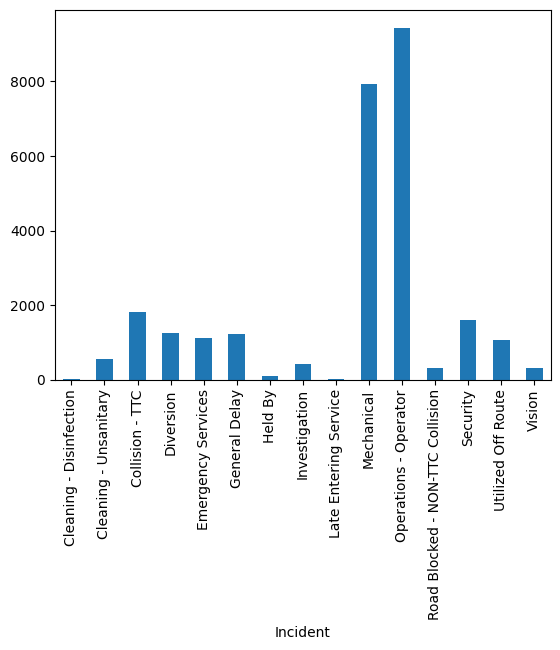

In [ ]:
# 1. 어떤 사고들이 발생하고 빈도가 어떤가?
df_incident_count = df.groupby("Incident").count()["Vehicle"]
df_incident_count.plot.bar()

In [ ]:
len(df.Incident.unique())

15

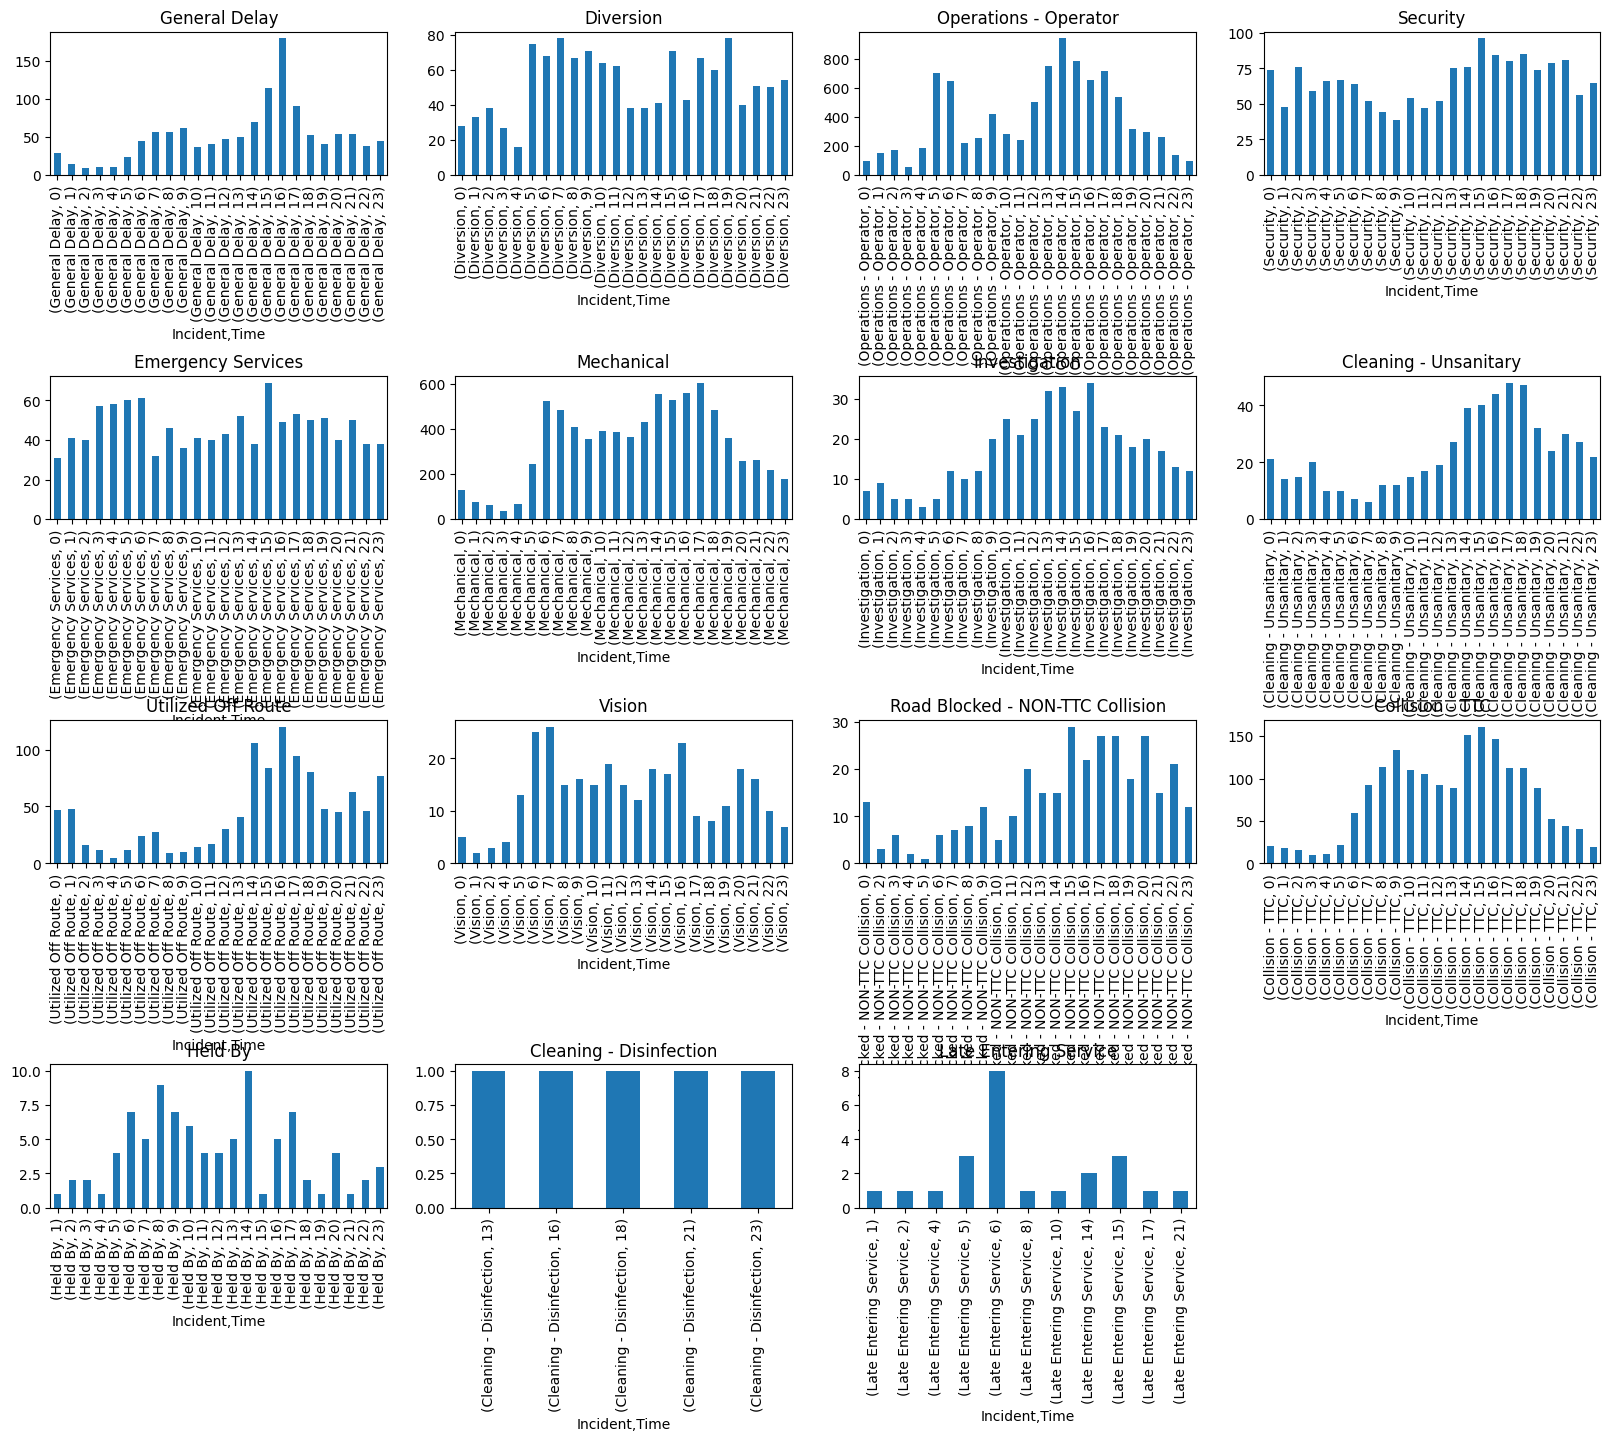

In [ ]:
# 2. 시간대에 따른 Incident 분포에 차이가 있는가?

plt.figure(figsize=(20,12))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.4, wspace=0.2)
for incident_name in df.Incident.unique():
    plt.subplot(4,4,x)
    x = x + 1
    df[df.Incident == incident_name].groupby(["Incident", "Time"]).count()["Vehicle"].plot.bar()
    plt.title(incident_name)
plt.show()


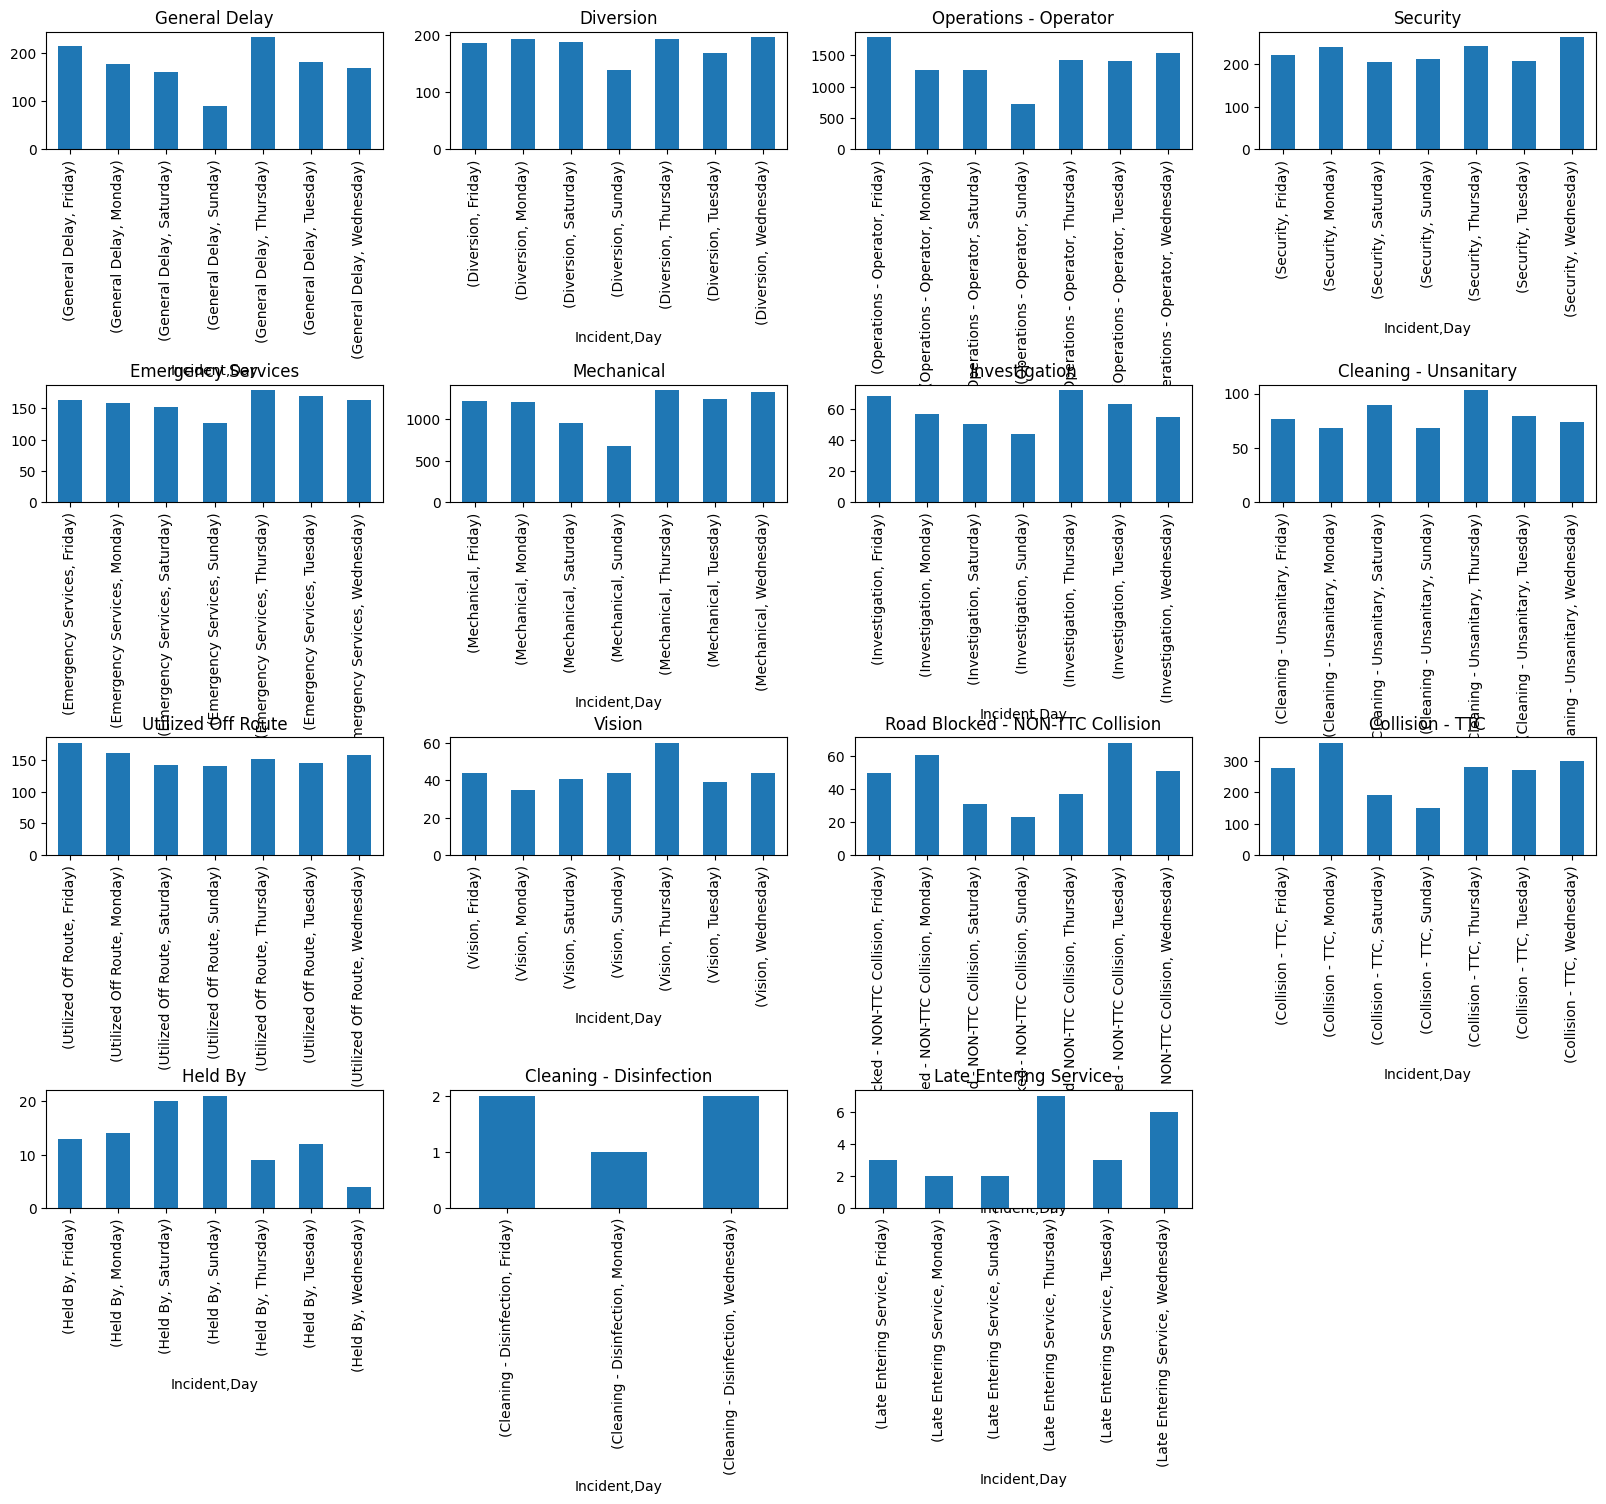

In [ ]:
# 3. 요일에 따른 Incident 분포에 차이가 있는가?

plt.figure(figsize=(20,12))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=2.0, wspace=0.2)
for incident_name in df.Incident.unique():
    plt.subplot(4,4,x)
    x = x + 1
    df[df.Incident == incident_name].groupby(["Incident", "Day"]).count()["Vehicle"].plot.bar()
    plt.title(incident_name)
plt.show()


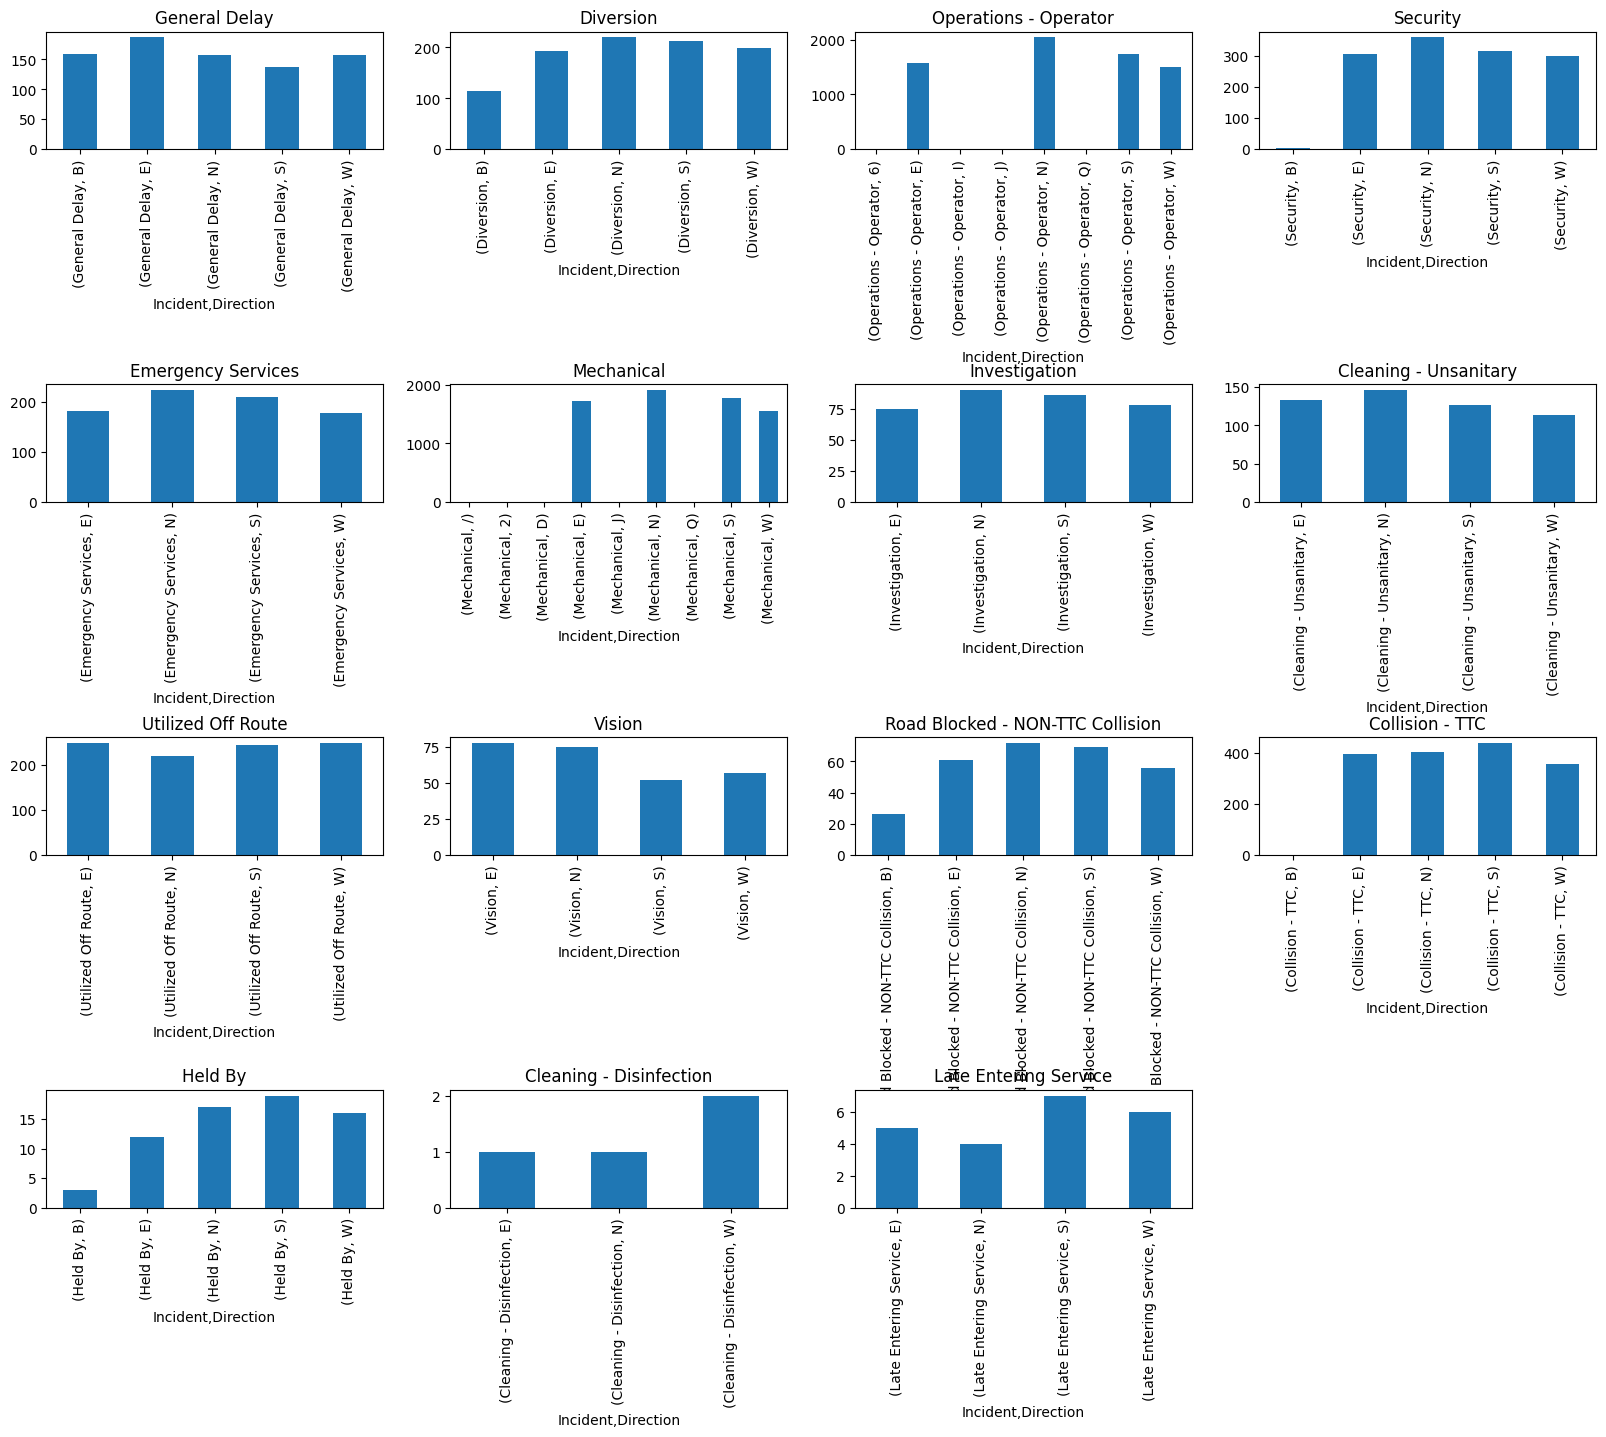

In [ ]:
# 4. Direction에 따른 Incident 분포에 차이가 있는가?

plt.figure(figsize=(20,12))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=2.0, wspace=0.2)
for incident_name in df.Incident.unique():
    plt.subplot(4,4,x)
    x = x + 1
    df[df.Incident == incident_name].groupby(["Incident", "Direction"]).count()["Vehicle"].plot.bar()
    plt.title(incident_name)
plt.show()


In [ ]:
list_categorical_columns

['Route', 'Time', 'Day', 'Location', 'Incident', 'Direction', 'Vehicle']

In [ ]:
df["Time"] = df["Time"].astype(object)

df[list_categorical_columns].describe()

,Route,Time,Day,Location,Incident,Direction,Vehicle
count,27033,27197,27197,27197,27197,21668,27197
unique,223,24,7,5942,15,12,2189
top,36,14,Friday,KIPLING STATION,Operations - Operator,N,0
freq,961,2095,4494,623,9446,5939,3318


#### 2) Numeric Data Analysis

##### 불필요한 컬럼 확인

In [ ]:
df[list_numeric_columns].nunique().sort_values()

Min Delay    375
Min Gap      420
dtype: int64

In [ ]:
df[list_numeric_columns].describe()

,Min Delay,Min Gap
count,27197.000000,27197.000000
mean,20.343126,32.926132
std,49.770170,51.422263
min,0.000000,0.000000
25%,9.000000,17.000000
50%,11.000000,22.000000
75%,20.000000,36.000000
max,999.000000,999.000000


<Axes: >

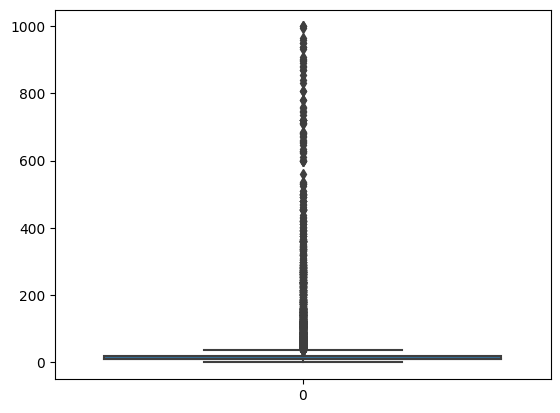

In [ ]:
sns.boxplot(df["Min Delay"])

#### 3) Categorical + Numerical Data Analysis
##### Categorical 데이터들이 Min Delay와 Min Gap에 영향을 끼치는지 확인해보자.

##### 일원분산분석 (ANOVA)
*   카테고리별 numeric data 분포 차이를 검증
*   전제 : 정규성, 등분산성, 독립성 (만족하지 않으면 해당 검정을 신뢰할 수 없음)
*   본 실습에서는 Min Delay, Min Gap 에 따른 numeric column data 분포 관계를 검증.
*   pvalue는 0.05 이하인 경우, 귀무가설을 기각한다고 정한다. (pvalue 기준은 항상 다를 수 있음. 정확한 기준은 없으나 일반적으로 0.05 사용)
*   https://ko.wikipedia.org/wiki/분산_분석#일원분산분석(one-way_ANOVA)





정규성 검정
*   검정 방법 : QQplot, Shpiro-Wilks Test
*   shapiro-wilks test 귀무가설 : 모집단의 분포는 정규 분포이다
*   shapiro-wilks test p-value < 0.05이면, 귀무가설 기각 (기각하지 못하여야 정규성을 만족)



((array([-4.05112633, -3.838625  , -3.72249764, ...,  3.72249764,
          3.838625  ,  4.05112633]),
  array([  0,   0,   0, ..., 994, 999, 999])),
 (24.021700251291634, 20.343126080082374, 0.4825917373355311))

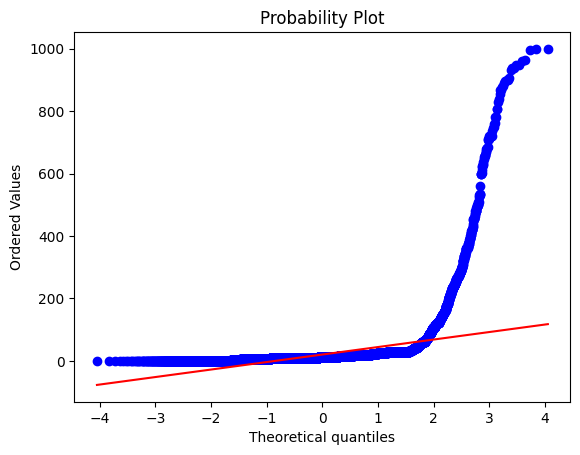

In [ ]:
# to do
# qqplot

stats.probplot(df["Min Delay"], dist=stats.norm, plot=plt)

((array([-4.05112633, -3.838625  , -3.72249764, ...,  3.72249764,
          3.838625  ,  4.05112633]),
  array([  0,   0,   0, ..., 984, 997, 999])),
 (30.263644121861446, 32.9261315586278, 0.5884577652394818))

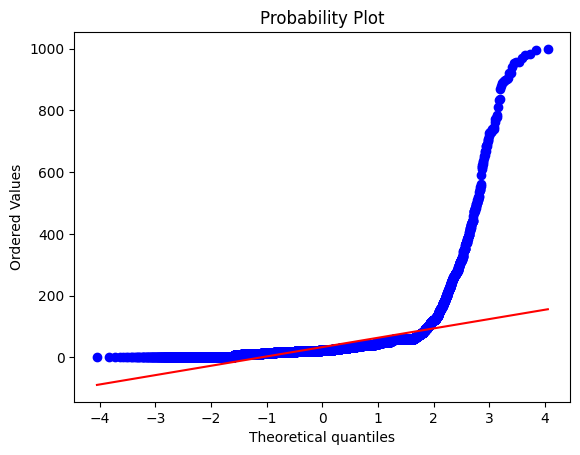

In [ ]:
stats.probplot(df["Min Gap"], dist=stats.norm, plot=plt)

In [ ]:
statistic, pvalue = stats.shapiro(df["Min Delay"])
print(statistic, pvalue)
#정규성을 만족하지 못함.

statistic, pvalue = stats.shapiro(df["Min Gap"])
print(statistic, pvalue)


0.2330927848815918 0.0
0.3465079069137573 0.0


/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


##### 크루스칼 왈리스 검정 Kruskall-Wallis test (비모수 검정)
*   비모수 검정이기 때문에 정규성/등분산성을 만족하지 않아도됨
*   단, 비모수 검정이기 때문에 검정 결과 신뢰도가 모수 검정보다 떨어짐

In [ ]:
list_meaningful_column_by_kruskall_1 = []

target_column = "Min Delay"
for column_name in list_categorical_columns:
  list_by_quality_value = []
  for quality_value in df[column_name].unique():
      df_tmp = df[df[column_name] == quality_value][target_column].dropna()
      list_by_quality_value.append(np.array(df_tmp))
  statistic, pvalue = kruskal(*list_by_quality_value)
  if pvalue <= 0.05:
    list_meaningful_column_by_kruskall_1.append(column_name)
  print(column_name, ", ",statistic,", ", pvalue)
print("all categorical columns : ", len(list_categorical_columns))
print("selected columns by kruskall : ", len(list_meaningful_column_by_kruskall_1), list_meaningful_column_by_kruskall_1)

Route ,  9937.790691015862 ,  0.0
Time ,  558.0581726592533 ,  2.75167102199247e-103
Day ,  63.09001667451537 ,  1.0580971938564101e-11
Location ,  11180.53448098517 ,  0.0
Incident ,  3020.8711495538596 ,  0.0
Direction ,  93.0472529659296 ,  1.2659469591871368e-14
Vehicle ,  3582.6903780426865 ,  5.192381578909752e-71
all categorical columns :  7
selected columns by kruskall :  7 ['Route', 'Time', 'Day', 'Location', 'Incident', 'Direction', 'Vehicle']


In [ ]:
list_meaningful_column_by_kruskall_2 = []

target_column = "Min Gap"
for column_name in list_categorical_columns:
  list_by_quality_value = []
  for quality_value in df[column_name].unique():
      df_tmp = df[df[column_name] == quality_value][target_column].dropna()
      list_by_quality_value.append(np.array(df_tmp))
  statistic, pvalue = kruskal(*list_by_quality_value)
  if pvalue <= 0.05:
    list_meaningful_column_by_kruskall_2.append(column_name)
  print(column_name, ", ",statistic,", ", pvalue)
print("all categorical columns : ", len(list_categorical_columns))
print("selected columns by kruskall : ", len(list_meaningful_column_by_kruskall_2), list_meaningful_column_by_kruskall_2)

Route ,  10040.838912564275 ,  0.0
Time ,  576.9889813236515 ,  3.0227032200685335e-107
Day ,  78.8504668919477 ,  6.171339184522473e-15
Location ,  11164.256525553788 ,  0.0
Incident ,  2634.6176312732214 ,  0.0
Direction ,  77.22070726086784 ,  1.3947776599530005e-11
Vehicle ,  3641.7510064246108 ,  4.375888828443656e-76
all categorical columns :  7
selected columns by kruskall :  7 ['Route', 'Time', 'Day', 'Location', 'Incident', 'Direction', 'Vehicle']


### 2-4 EDA with pandas_profiling

In [ ]:
df.profile_report().to_file(path_lecture + "data/data_eda_with_pandasprofiling.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

##### Insight
- 대중 교통 데이터 분석을 진행하니, Min Delay가 대중 교통 운행에 문제가 될 수 있음을 직관적으로 파악
- 이 문제를 해결하기 위한 데이터 분석을 진행하기로 결정
- target column을 Min Delay로 설정하고, 이를 예측할 수 있는 분석을 진행하면 추후 대중 교통 효율화에 도움되지 않을까?

## 3. Data Processing 2

### 3-1 Missing Values

In [ ]:
df.isna().sum()

# 제거를 하거나, 다른 값으로 대체하여 사용가능
# 이번 실습에서는 Nan값을 고유값으로 활용예정 -> -1로 치환하여 분석 진행.

Route         164
Time            0
Day             0
Location        0
Incident        0
Min Delay       0
Min Gap         0
Direction    5529
Vehicle         0
dtype: int64

In [ ]:
df.head(2)

,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,320,2,Saturday,YONGE AND DUNDAS,General Delay,0,0,NaN,8531
1,325,2,Saturday,OVERLEA AND THORCLIFFE,Diversion,131,161,W,8658


In [ ]:
df = df.fillna(-1)
df.isna().sum()

Route        0
Time         0
Day          0
Location     0
Incident     0
Min Delay    0
Min Gap      0
Direction    0
Vehicle      0
dtype: int64

### 3-2 Feature Transformation

In [ ]:
target_column = "Min Delay"

In [ ]:
X = df.drop(target_column, axis=1)
Y = df[target_column]

##### Feature Scaling
*   Standardization과 MinMaxScaling은 다른 것.
*   MinMaxScaling은 [0,1]로 값을 scaling 하는 것 (예 sklearn의 MinMaxScaler())
*   Standardization은 정규분포의 표준화를 활용하여 scaling하는 것 (예 sklearn의 StandardScaler())



In [ ]:
list_numeric_columns.remove(target_column)
list_numeric_columns

['Min Gap']

In [ ]:
scaler = MinMaxScaler()
X.loc[:, list_numeric_columns] = scaler.fit_transform(X[list_numeric_columns])
X.head(2)

,Route,Time,Day,Location,Incident,Min Gap,Direction,Vehicle
0,320,2,Saturday,YONGE AND DUNDAS,General Delay,0.000000,-1,8531
1,325,2,Saturday,OVERLEA AND THORCLIFFE,Diversion,0.161161,W,8658


##### One-hot Encoding for categorical data
- vehicle은 버스를 특정지으므로 제거


In [ ]:
list_categorical_columns.remove("Vehicle")

In [ ]:
list_categorical_columns

['Route', 'Time', 'Day', 'Location', 'Incident', 'Direction']

In [ ]:
X = pd.get_dummies(X)

In [ ]:
X.head(2)

,Time,Min Gap,Vehicle,Route_-1,Route_1,Route_10,Route_100,Route_101,Route_102,Route_104,...,Direction_6,Direction_B,Direction_D,Direction_E,Direction_I,Direction_J,Direction_N,Direction_Q,Direction_S,Direction_W
0,2,0.000000,8531,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0.161161,8658,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X = X.drop("Vehicle", axis=1)
X.head(2)

,Time,Min Gap,Route_-1,Route_1,Route_10,Route_100,Route_101,Route_102,Route_104,Route_105,...,Direction_6,Direction_B,Direction_D,Direction_E,Direction_I,Direction_J,Direction_N,Direction_Q,Direction_S,Direction_W
0,2,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0.161161,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### 3-3 Feature Reduction

In [ ]:
# 2차원 축소
pca = PCA(n_components=2)
X_under_pca_two_dimension = pca.fit_transform(X)
print("2차원 축소 PCA 설명력 : ",sum(pca.explained_variance_ratio_))

# 3차원 축소
pca = PCA(n_components=3)
X_under_pca_three_dimension = pca.fit_transform(X)
print("3차원 축소 PCA 설명력 : ",sum(pca.explained_variance_ratio_))

2차원 축소 PCA 설명력 :  0.8901773846848542
3차원 축소 PCA 설명력 :  0.8959651102997495


In [ ]:
list_pca_explained_ratio = []
for i in range(2,15):
    pca_tmp = PCA(n_components=i)
    pca_tmp.fit(X)
    list_pca_explained_ratio.append(sum(pca_tmp.explained_variance_ratio_))

In [ ]:
list_pca_explained_ratio

[0.8901773846884815,
 0.8959651102917675,
 0.9013493296816394,
 0.9064979317541247,
 0.9113859644385638,
 0.9157740009599005,
 0.9200634084272569,
 0.9242078784615937,
 0.9282556257675513,
 0.9321110137401849,
 0.9356489060269242,
 0.9382251179439778,
 0.9399274727894916]

In [ ]:
pca = PCA(n_components=15)
pca.fit(X)
X_pca = pca.transform(X)

### 3-4 Summary
##### 최종 생성 Feature는 아래와 같은 특성을 가짐
1.   Missing Value 처리 : NaN값을 -1로 일괄 처리
2.   Feature Transformation : feature scaling 진행
3.   Feature Reduction : 15차원으로 축소

X_pca, Y

## 4. Model Analysis

### 4-1. Regressor Model

In [ ]:
list_model_type = []
list_model_rmse = []
list_model_best_params = []

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size = 0.35, random_state=random_state)

In [ ]:
regr = RandomForestRegressor(max_depth=4, random_state=random_state)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, random_state=1234)

In [ ]:
y_prd = regr.predict(X_test)
rmse = mean_squared_error(y_test, y_prd)**0.5

list_model_type.append("base regressor model")
list_model_rmse.append(rmse)
list_model_best_params.append("")

### 4-2. RandomForest' optimization

In [ ]:
cv = 3

In [ ]:
# model_learning_with_gridsearch 함수 구현
def model_learning_with_gridsearch(model, hyper_parameter, X, Y, metric="neg_mean_squared_error"):
  grid_cv_opt = GridSearchCV(estimator=model, param_grid=hyper_parameter, cv=cv, scoring=metric)
  grid_cv_opt.fit(X,Y)

  y_prd = grid_cv_opt.predict(X_test)
  rmse = mean_squared_error(y_test, y_prd)**0.5

  print("validation -> best model hyper-paramet : ", grid_cv_opt.best_params_)
  print("validation -> best model rmse : ", rmse)

  return grid_cv_opt.best_params_, rmse

In [ ]:
hyper_params_bagging = {
    'n_estimators': [100,200],
    'criterion': ["squared_error"],
    'max_depth': [5,7,10],
              }
params, score = model_learning_with_gridsearch(RandomForestRegressor(), hyper_params_bagging, X_train, y_train)
list_model_type.append("Bagging with RandomForestRegressor")
list_model_best_params.append(params)
list_model_rmse.append(score)

validation -> best model hyper-paramet :  {'criterion': 'squared_error', 'max_depth': 5, 'n_estimators': 100}
validation -> best model rmse :  44.71937402179885


### 4-3. XGBRegressor' optimization

In [ ]:
hyper_params_xgboost = {
    'n_estimators': [100],
    'max_leaves': [1, 3],
    'max_depth': [5,10],
    "learning_late" : [0.1, 0.5]
              }
params, score = model_learning_with_gridsearch(XGBRegressor(), hyper_params_xgboost, X_train, y_train)
list_model_type.append("Boosting with XGBRegressor")
list_model_best_params.append(params)
list_model_rmse.append(score)

[02:56:46] WARNING: ../src/learner.cc:767: 
Parameters: { "learning_late" } are not used.

[02:56:48] WARNING: ../src/learner.cc:767: 
Parameters: { "learning_late" } are not used.

[02:56:50] WARNING: ../src/learner.cc:767: 
Parameters: { "learning_late" } are not used.

[02:56:52] WARNING: ../src/learner.cc:767: 
Parameters: { "learning_late" } are not used.

[02:56:53] WARNING: ../src/learner.cc:767: 
Parameters: { "learning_late" } are not used.

[02:56:55] WARNING: ../src/learner.cc:767: 
Parameters: { "learning_late" } are not used.

[02:56:59] WARNING: ../src/learner.cc:767: 
Parameters: { "learning_late" } are not used.

[02:57:04] WARNING: ../src/learner.cc:767: 
Parameters: { "learning_late" } are not used.

[02:57:08] WARNING: ../src/learner.cc:767: 
Parameters: { "learning_late" } are not used.

[02:57:12] WARNING: ../src/learner.cc:767: 
Parameters: { "learning_late" } are not used.

[02:57:19] WARNING: ../src/learner.cc:767: 
Parameters: { "learning_late" } are not used.


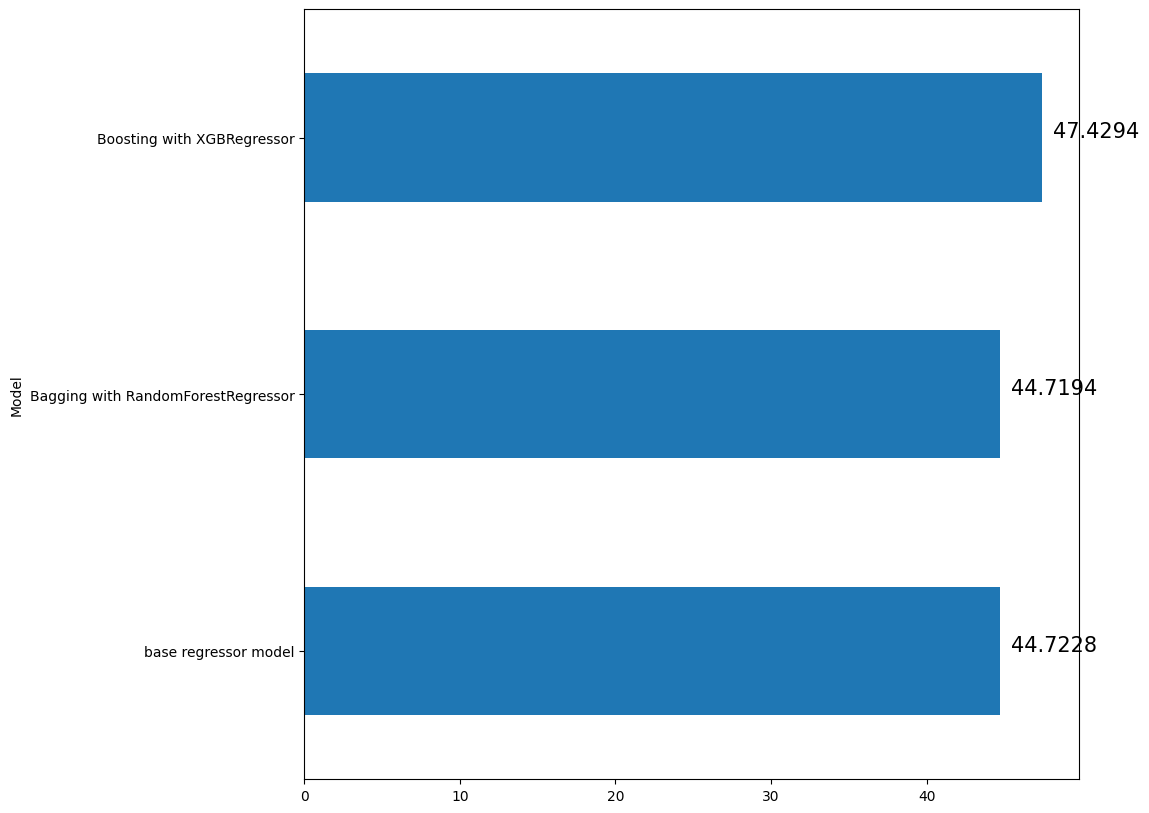

In [ ]:
df_metric = pd.DataFrame({'Model':list_model_type, 'rmse':list_model_rmse})
ax = df_metric.plot.barh(x='Model', y='rmse', rot=0, figsize=(10,10), legend=False)
for bar in ax.patches:
    ax.annotate(format(bar.get_width(), '.4f'),
                   (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                   size=15, xytext=(8, 0),
                   textcoords='offset points')